# ¿Cuál es la mejor tarifa?

Trabajo como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


Propósito del Proyecto
El objetivo principal de este proyecto es determinar cuál de las dos tarifas de prepago ofrecidas por Megaline, "Surf" y "Ultimate", genera más ingresos. Este análisis ayudará al departamento comercial a tomar decisiones informadas respecto al presupuesto de publicidad, basándose en el rendimiento económico de cada tarifa. Al entender cuál tarifa es más rentable, Megaline podrá optimizar sus estrategias de marketing y promoción para maximizar la rentabilidad.

Acciones a seguir
Para lograr este objetivo, seguiré varios pasos clave:

Inicialización: Cargaré las librerías necesarias para el manejo y análisis de datos.
Carga de Datos: Importaré los datasets proporcionados que contienen información sobre los usuarios, sus llamadas, mensajes, uso de internet y detalles de las tarifas.
Exploración y Limpieza de Datos: Revisaré los datos para entender su estructura, comprobar la calidad de los datos y realizar las limpiezas necesarias (como tratar valores nulos o incorrectos).
Preparación de Datos: Transformaré los datos para su análisis, incluyendo la conversión de tipos de datos si es necesario, y calcularé los ingresos mensuales por usuario basándome en su uso y el plan que tienen.
Análisis Exploratorio: Estudiaré el comportamiento de los clientes en ambos planes para entender sus necesidades y cómo utilizan los servicios.
Análisis Estadístico: Realizaré pruebas estadísticas para comparar los ingresos generados por cada tarifa y determinar si existen diferencias significativas entre ellas.
Visualización: Crearé visualizaciones para representar los resultados del análisis, facilitando la interpretación y la presentación de conclusiones.
Conclusión: Redactaré una conclusión basada en los hallazgos del análisis, proporcionando recomendaciones claras basadas en los datos.

## Inicialización

In [221]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats




## Cargar datos

In [222]:
# Carga los archivos de datos en diferentes DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [223]:
# Información del DataFrame 'calls'
print(calls.info())
print(calls.head())
# Convertir 'call_date' a datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])


# Información del DataFrame 'internet'
print(internet.info())
print(internet.head())
# Convertir 'session_date' a datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])


# Información del DataFrame 'messages'
print(messages.info())
print(messages.head())
# Convertir 'message_date' a datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])


# Información del DataFrame 'users'
print(users.info())
print(users.head())
# Convertir 'reg_date' y 'churn_date' a datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')  # Usamos errors='coerce' para manejar fechas no válidas


# Información del DataFrame 'plans'
print(plans.info())
print(plans.head())

print("Valores nulos en 'calls':")
print(calls.isnull().sum())

print("Valores nulos en 'internet':")
print(internet.isnull().sum())

print("Valores nulos en 'messages':")
print(messages.isnull().sum())

print("Valores nulos en 'users':")
print(users.isnull().sum())

# Verificar valores nulos en 'plans'
print("Valores nulos en 'plans':")
print(plans.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-nul

## Tarifas

In [224]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [225]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


No parece haber problemas con los tipos de datos, ni datos ausentes que requieran correcciones. Las estructuras de los datos están claramente definidas y parecen listas para ser utilizadas en cálculos o comparaciones futuras.

## Corregir datos

In [226]:
# Convertir megabytes a gigabytes y actualizar el DataFrame
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024
plans.drop('mb_per_month_included', axis=1, inplace=True)

print(plans)


   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                   15.0  
1             0.01            0.01  ultimate                   30.0  


## Usuarios/as

In [227]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [228]:
# Imprime una muestra de datos para usuarios
print(users.head())

print("Número de usuarios duplicados:", users.duplicated().sum())


print(users.describe())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  
2 2018-10-21      surf        NaT  
3 2018-01-28      surf        NaT  
4 2018-05-23      surf        NaT  
Número de usuarios duplicados: 0
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   7

Users contiene información detallada sobre 500 usuarios, con campos bien estructurados y tipos de datos apropiados. La mayoría de los usuarios están activos, como indica la columna churn_date que principalmente contiene valores nulos, y no se detectaron registros duplicados. El análisis estadístico revela una distribución amplia en la edad de los usuarios, desde 18 hasta 75 años, con un promedio aproximado de 45 años. Esta variabilidad en la edad sugiere que Megaline atiende a un rango demográfico diverso, lo cual es crucial para planificar estrategias de marketing y servicios que aborden las necesidades de diferentes grupos de edad de manera efectiva.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [229]:
users['is_active'] = users['churn_date'].isna()


## Llamadas

In [230]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [231]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


El DataFrame users está bien estructurado y no presenta problemas importantes en cuanto a tipos de datos o valores nulos inesperados. Parece estar listo para ser utilizado en análisis más detallados o para ser combinado con otros DataFrames para análisis próximos.

### Corregir los datos

In [232]:
calls['duration_rounded'] = np.ceil(calls['duration'])

### Enriquecer los datos

In [233]:
calls['month_year'] = calls['call_date'].dt.to_period('M')

print(calls)


              id  user_id  call_date  duration  duration_rounded month_year
0        1000_93     1000 2018-12-27      8.52               9.0    2018-12
1       1000_145     1000 2018-12-27     13.66              14.0    2018-12
2       1000_247     1000 2018-12-27     14.48              15.0    2018-12
3       1000_309     1000 2018-12-28      5.76               6.0    2018-12
4       1000_380     1000 2018-12-30      4.22               5.0    2018-12
...          ...      ...        ...       ...               ...        ...
137730  1499_199     1499 2018-11-21      8.72               9.0    2018-11
137731  1499_200     1499 2018-10-20     10.89              11.0    2018-10
137732  1499_201     1499 2018-09-21      8.12               9.0    2018-09
137733  1499_202     1499 2018-10-10      0.37               1.0    2018-10
137734  1499_203     1499 2018-12-29     13.86              14.0    2018-12

[137735 rows x 6 columns]


## Mensajes

In [234]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [235]:
# Imprime una muestra de datos para los mensajes
print(messages.head())
print("Número de filas duplicadas:", messages.duplicated().sum())


print(messages.describe())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
Número de filas duplicadas: 0
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


Messages tiene 76,051 registros de mensajes enviados por usuarios, sin filas duplicadas, lo cual indica de una buena integridad de datos. Los campos incluyen un identificador de mensaje, user_id, y la fecha del mensaje, todos completos y correctamente escritos e identificables. La muestra de datos muestra que cada entrada registra mensajes individuales con fechas específicas, lo que significa un registro detallado de la actividad de mensajería de los usuarios. La descripción estadística revela que el promedio de mensajes enviados por usuario es aproximadamente 68, con una desviación de 40, indicando una variación considerable en el uso del servicio de mensajería entre los usuarios. Esto quiere decir que existe una buena diversidad en la comunicación entre los usuarios, con algunos enviando muchos más mensajes que otros, lo que puede reflejar diferentes estilos de comunicación o necesidades de conectividad.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [236]:
#Agregar una columna para el período mensual y contar mensajes por usuario y mes
messages['month_year'] = messages['message_date'].dt.to_period('M')

message_counts = messages.groupby(['user_id', 'month_year']).size().reset_index(name='message_count')
#Identificación de usuarios activos
threshold_messages = 5
message_counts['is_active'] = message_counts['message_count'] >= threshold_messages

messages = messages.merge(message_counts, on=['user_id', 'month_year'], how='left')

print(messages.sample(5))

             id  user_id message_date month_year  message_count  is_active
62617    1394_6     1394   2018-11-05    2018-11             32       True
4193   1043_266     1043   2018-12-19    2018-12             87       True
37915  1250_168     1250   2018-12-01    2018-12             79       True
36594   1244_26     1244   2018-12-14    2018-12             41       True
30013   1188_31     1188   2018-11-12    2018-11             49       True


## Internet

In [237]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [238]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

print("Número de filas duplicadas:", internet.duplicated().sum())


print(internet.describe())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
Número de filas duplicadas: 0
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


Internet contiene 104,825 sesiones de uso de internet por parte de los usuarios, sin duplicados, indicando un manejo adecuado de los datos. Los campos incluyen identificadores de sesión, user_id, la fecha de la sesión y los megabytes usados durante cada sesión, con todos los campos correctamente llenados y tipificados. Los datos revelan un uso de internet que varía significativamente entre los usuarios, con un consumo promedio de aproximadamente 367 MB por sesión. La conversión de MB a GB en la muestra muestra un redondeo que refleja la política de Megaline de cobrar el uso de datos por gigabytes completos.








### Enriquecer los datos

In [239]:
internet['month_year'] = internet['session_date'].dt.to_period('M')
#Redondear los MB usados al GB más próximo al final del mes por usuario
monthly_gb_usage = internet.groupby(['user_id', 'month_year'])['mb_used'].sum().reset_index()

# Convertimos MB a GB redondeando hacia arriba después de la agregación
monthly_gb_usage['gb_used'] = np.ceil(monthly_gb_usage['mb_used'] / 1024)

# Eliminamos la columna original de mb_used para evitar confusiones
monthly_gb_usage.drop('mb_used', axis=1, inplace=True)

# Mostrar una muestra de los datos agregados y redondeados
print(monthly_gb_usage.sample(5))

      user_id month_year  gb_used
1891     1405    2018-12     14.0
2012     1434    2018-08     15.0
1804     1390    2018-04     14.0
397      1082    2018-07     13.0
26       1008    2018-10     17.0


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [240]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                 50               500               20          10   
1               1000              3000               70           7   

   usd_per_message  usd_per_minute plan_name  gb_per_month_included  
0             0.03            0.03      surf                   15.0  
1             0.01            0.01  ultimate                   30.0  


## Agregar datos por usuario


In [241]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = calls.groupby(['user_id', 'month_year']).size().reset_index(name='calls_per_month')


In [242]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = calls.groupby(['user_id', 'month_year'])['duration_rounded'].sum().reset_index(name='minutes_per_month')


In [243]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = messages.groupby(['user_id', 'month_year']).size().reset_index(name='messages_per_month')


In [244]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

data_per_user_month = monthly_gb_usage

In [245]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_data = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'month_year'], how='outer')

monthly_data = pd.merge(monthly_data, messages_per_user_month, on=['user_id', 'month_year'], how='outer')

monthly_data = pd.merge(monthly_data, data_per_user_month, on=['user_id', 'month_year'], how='outer')

# Rellenar los valores NaN con 0, asumiendo que NaN significa que no hubo actividad en esa categoría
monthly_data.fillna(0, inplace=True)


In [246]:
# Añade la información de la tarifa
monthly_data = pd.merge(monthly_data, users[['user_id', 'plan']], on='user_id', how='left')

print(monthly_data.sample(5))

      user_id month_year  calls_per_month  minutes_per_month  \
12       1004    2018-07             49.0              381.0   
1850     1403    2018-12             33.0              231.0   
1774     1390    2018-04             52.0              365.0   
643      1140    2018-08             89.0              577.0   
2278     1194    2018-08              0.0                0.0   

      messages_per_month  gb_used      plan  
12                  26.0     24.0      surf  
1850                 0.0     23.0  ultimate  
1774                 0.0     14.0  ultimate  
643                 13.0     21.0      surf  
2278                10.0      6.0      surf  


In [247]:
# Calcula el ingreso mensual para cada usuario
# Definir los límites y tarifas de los planes
plan_details = {
    'surf': {
        'monthly_fee': 20,
        'minutes_included': 500,
        'messages_included': 50,
        'data_included': 15, 
        'usd_per_minute': 0.03,
        'usd_per_message': 0.03,
        'usd_per_gb': 10
    },
    'ultimate': {
        'monthly_fee': 70,
        'minutes_included': 3000,
        'messages_included': 1000,
        'data_included': 30,  
        'usd_per_minute': 0.01,
        'usd_per_message': 0.01,
        'usd_per_gb': 7
    }
}

def calculate_revenue(row):
    plan = row['plan']
    # Límites y tarifas del plan del usuario
    limits = plan_details[plan]
    
    # Excedentes
    extra_minutes = max(0, row['minutes_per_month'] - limits['minutes_included'])
    extra_messages = max(0, row['messages_per_month'] - limits['messages_included'])
    extra_data = max(0, row['gb_used'] - limits['data_included'])
    
    # Costes de excedentes
    extra_minutes_cost = extra_minutes * limits['usd_per_minute']
    extra_messages_cost = extra_messages * limits['usd_per_message']
    extra_data_cost = extra_data * limits['usd_per_gb']  
    
    total_revenue = limits['monthly_fee'] + extra_minutes_cost + extra_messages_cost + extra_data_cost
    return total_revenue

monthly_data['monthly_revenue'] = monthly_data.apply(calculate_revenue, axis=1)

print(monthly_data.sample(5))

      user_id month_year  calls_per_month  minutes_per_month  \
957      1203    2018-12             69.0              483.0   
365      1077    2018-06            100.0              716.0   
749      1160    2018-08             78.0              642.0   
1722     1379    2018-12            144.0             1103.0   
1705     1374    2018-06             60.0              414.0   

      messages_per_month  gb_used      plan  monthly_revenue  
957                 46.0     13.0      surf            20.00  
365                 81.0     16.0  ultimate            70.00  
749                 24.0     23.0      surf           104.26  
1722               126.0     70.0      surf           590.37  
1705                66.0     35.0      surf           220.48  


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

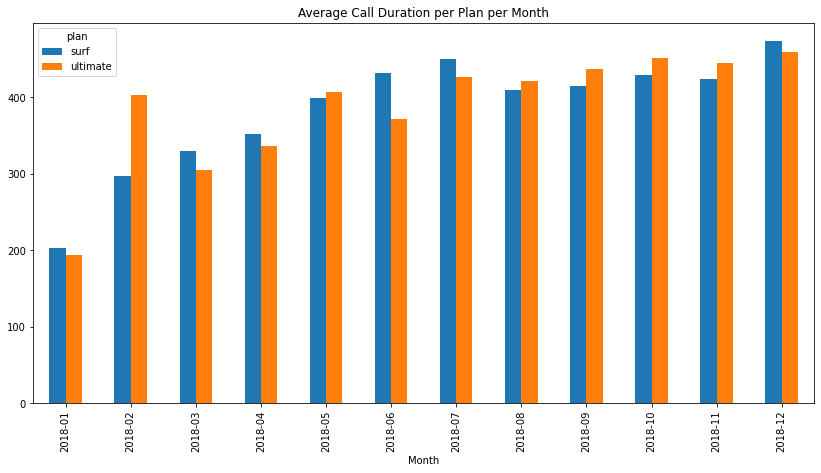

In [248]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
average_call_duration = monthly_data.groupby(['plan', 'month_year'])['minutes_per_month'].mean().unstack(0)  

average_call_duration.plot(kind='bar',
                           figsize=(14, 7), 
                           title='Average Call Duration per Plan per Month', 
                           xlabel = 'Month', 
                           label = 'Average call duration (minutes)',
                           )
plt.show()


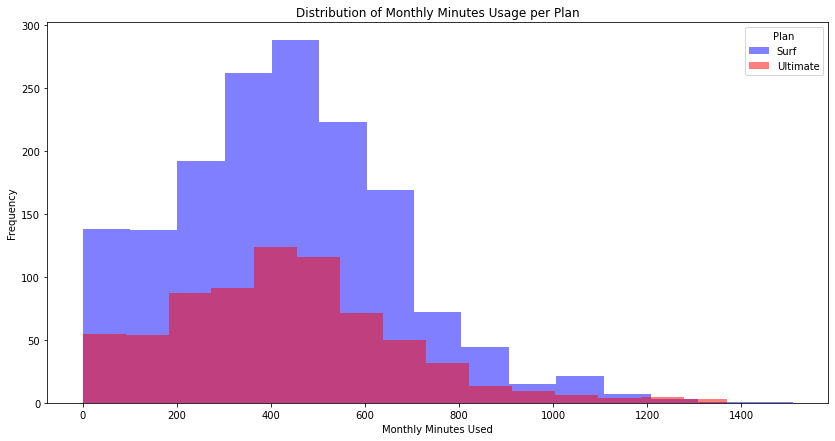

In [249]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = monthly_data[monthly_data['plan'] == 'surf']['minutes_per_month']
ultimate_minutes = monthly_data[monthly_data['plan'] == 'ultimate']['minutes_per_month']

plt.figure(figsize=(14, 7))
plt.hist(surf_minutes, bins=15, alpha=0.5, label='Surf', color='blue')
plt.hist(ultimate_minutes, bins=15, alpha=0.5, label='Ultimate', color='red')
plt.title('Distribution of Monthly Minutes Usage per Plan')
plt.xlabel('Monthly Minutes Used')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.show()

In [250]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_var_by_plan = monthly_data.groupby('plan')['minutes_per_month'].agg(['mean', 'var', 'median', 'std']).reset_index()
mean_var_by_plan['mode'] = monthly_data.groupby('plan')['minutes_per_month'].agg(pd.Series.mode).reset_index()['minutes_per_month']

print(mean_var_by_plan)
print(monthly_data['minutes_per_month'].describe())

adjusted_mode_by_plan = monthly_data[monthly_data['minutes_per_month'] > 0].groupby('plan')['minutes_per_month'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No mode').reset_index(name='adjusted_mode')

print(adjusted_mode_by_plan)

       plan        mean           var  median         std  mode
0      surf  428.749523  54968.279461   425.0  234.453150   0.0
1  ultimate  430.450000  57844.464812   424.0  240.508762   0.0
count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: minutes_per_month, dtype: float64
       plan  adjusted_mode
0      surf          413.0
1  ultimate          432.0


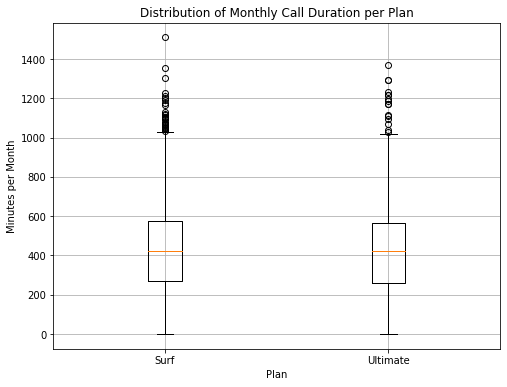

In [251]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
surf_data = monthly_data[monthly_data['plan'] == 'surf']['minutes_per_month']
ultimate_data = monthly_data[monthly_data['plan'] == 'ultimate']['minutes_per_month']

# Diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot([surf_data.dropna(), ultimate_data.dropna()], labels=['Surf', 'Ultimate'])
plt.title('Distribution of Monthly Call Duration per Plan')
plt.ylabel('Minutes per Month')
plt.xlabel('Plan')
plt.grid(True)
plt.show()


La distribución de los minutos en el plan Ultimate parece ser más consistente con menos valores atípicos, indicando un uso más uniforme de los minutos de llamadas.


El plan Surf muestra varios valores atípicos, lo que indica que hay algunos usuarios que utilizan significativamente más minutos de los típicos para ese plan.
El plan Ultimate también tiene valores atípicos, pero son menos en comparación y menos extremos que en el plan Surf.


Los valores atípicos en el plan Surf podrían indicar que algunos usuarios de este plan podrían beneficiarse al cambiarse al plan Ultimate, dependiendo de otros factores como el uso de datos y mensajes.
La mayor uniformidad en el uso de llamadas en el plan Ultimate podría reflejar que los usuarios de este plan están más satisfechos con los límites de llamadas o que su estilo de vida o necesidades de trabajo justifican un uso más alto y consistente.

Los datos de duración mensual de llamadas para los planes Surf y Ultimate muestran estadísticas bastante similares en términos de media, varianza, mediana y desviación estándar, indicando patrones de uso consistentes entre los planes. Ambos planes tienen una duración media de llamadas cercana a 430 minutos, con una dispersión significativa como lo demuestra la desviación estándar de aproximadamente 234 para Surf y 240 para Ultimate. La moda original de 0 minutos sugiere que hay registros con duraciones de llamadas no conectadas o errores en la recolección de datos. Sin embargo, al ajustar la moda para excluir los ceros, se observa que los minutos más comunes son 413 para Surf y 432 para Ultimate, reflejando un uso más típico y activo de los servicios telefónicos. Estos resultados ajustados proporcionan una visión más realista y útil del comportamiento de llamadas de los usuarios bajo cada plan.

### Mensajes

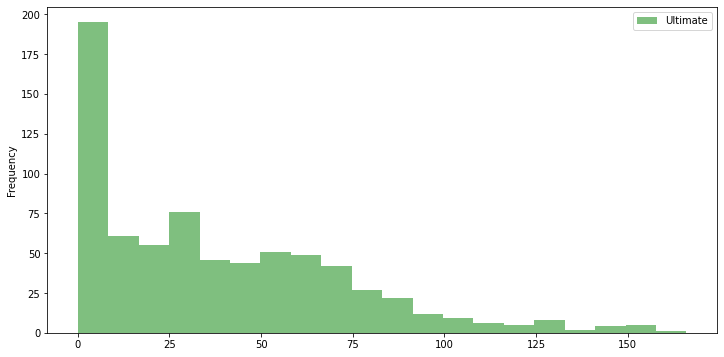

In [252]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_surf = monthly_data[monthly_data['plan'] == 'surf']['messages_per_month']
messages_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['messages_per_month']

     

messages_ultimate.plot(kind='hist',
                  figsize=(12, 6),
                  bins=20,
                  alpha=0.5,
                  label='Ultimate',
                   color='green',
                      legend =True)
plt.show()

       plan       mean     variance  median    std_dev  mode
0      surf  31.159568  1126.724522    24.0  33.566717   0.0
1  ultimate  37.551389  1208.756744    30.0  34.767179   0.0


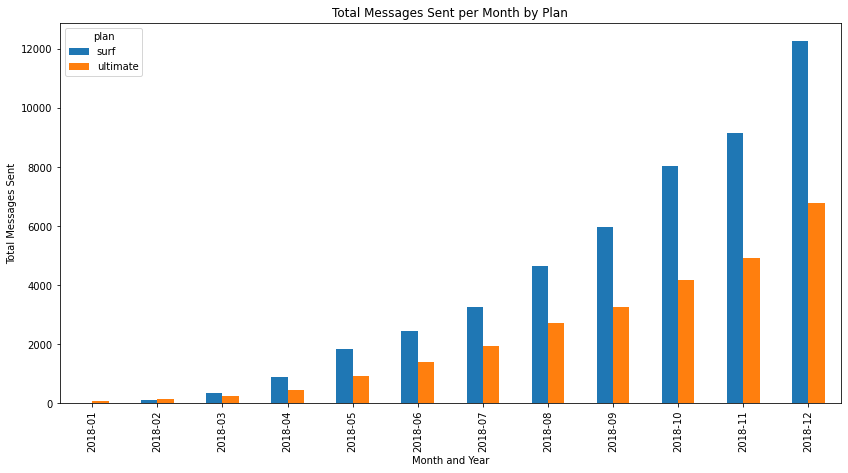

In [253]:
# Media y la varianza de los mensajes enviados por cada plan
stats_msgs = monthly_data.groupby('plan')['messages_per_month'].agg(['mean', 'var', 'median', 'std', lambda x: x.mode()[0]]).reset_index()
stats_msgs.columns = ['plan', 'mean', 'variance', 'median', 'std_dev', 'mode']

print(stats_msgs)

monthly_message_counts = monthly_data.groupby(['month_year', 'plan'])['messages_per_month'].sum().unstack()

monthly_message_counts.plot(kind='bar', 
                            figsize=(14, 7),
                            title='Total Messages Sent per Month by Plan',
                            xlabel='Month and Year',
                            ylabel='Total Messages Sent',
                            legend=True)

plt.show()

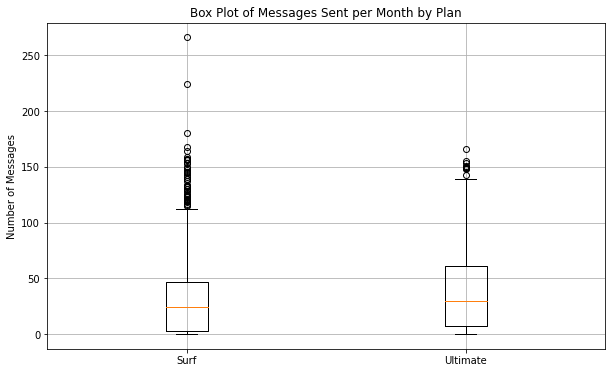

In [254]:
msgs_surf = monthly_data[monthly_data['plan'] == 'surf']['messages_per_month']
msgs_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['messages_per_month']

plt.figure(figsize=(10, 6))
plt.boxplot([msgs_surf.dropna(), msgs_ultimate.dropna()], labels=['Surf', 'Ultimate'])
plt.title('Box Plot of Messages Sent per Month by Plan')
plt.ylabel('Number of Messages')
plt.grid(True)
plt.show()

Análisis de los Gráficos y Estadísticas:

Histograma de Mensajes:
Los histogramas muestran que la mayoría de los usuarios del plan Surf tienden a enviar menos mensajes (concentrados en el rango bajo de 0-50 mensajes por mes), mientras que los del plan Ultimate tienen una distribución más amplia y extendida.
Aunque la mayoría de los usuarios de ambos planes envían cantidades moderadas de mensajes, el plan Ultimate muestra una distribución un poco más extendida hacia cantidades mayores.

Diagrama de Cajas:
El diagrama de cajas revela la caja es más amplia en el plan Ultimate, indicando una mayor dispersión en el número de mensajes enviados comparado con el plan Surf.
Los valores atípicos son más numerosos en el plan Surf, sugiriendo que un número significativo de usuarios envía mucho más mensajes de lo típico para ese plan.

El gráfico de barras muestra claramente que el los usuarios del plan Surf envían más mensajes en comparación con los del plan Ultimate, pero esta diferencia podría explicarse principalmente por la mayor cantidad de usuarios en el plan Surf en lugar de una mayor actividad de mensajería individual. Aunque el plan Ultimate tiene un promedio de mensajes por usuario mayor, lo que indica que, individualmente, estos usuarios pueden ser más activos en mensajería. Esto se refleja en el análisis estadístico donde el promedio y otras medidas de centralidad son más altas para el plan Ultimate comparado con Surf, sugiriendo que los usuarios de Ultimate utilizan más intensivamente el servicio de mensajes, probablemente influenciado por las mayores inclusiones que ofrece el plan.

Desde una perspectiva estadística, los usuarios del plan Surf tienen una media de mensajes enviados por mes ligeramente inferior a la de los usuarios del plan Ultimate, pero la varianza en el plan Surf es menor que en Ultimate, lo que indica que el número de mensajes enviados por los usuarios de Surf es más consistente mes a mes comparado con los de Ultimate. Esto es respaldado por las medidas de tendencia central y dispersión como la media y la desviación estándar respectivamente, donde el plan Surf muestra menos dispersión en los datos, evidenciando una homogeneidad mayor en el comportamiento de envío de mensajes entre sus usuarios.

Comportamiento de los usuarios por plan:

Plan Surf

Menor uso promedio de mensajes: La media de mensajes enviados es más baja para los usuarios del plan Surf en comparación con los del plan Ultimate, lo que sugiere que, en general, los usuarios de Surf son menos activos en el envío de mensajes.
Alta varianza y valores atípicos significativos: Aunque la mayoría de los usuarios de Surf envían menos mensajes, hay un número considerable de valores atípicos que envían muchos más mensajes de lo común. Esto indica que hay una minoría de usuarios en el plan Surf cuyo uso de mensajería es extremadamente alto, posiblemente más allá de los límites que el plan les ofrece de manera económica.
Posible necesidad de revisión de plan: Los valores atípicos en el plan Surf sugieren que, aunque el plan puede ser adecuado para la mayoría, no se ajusta bien a las necesidades de todos los usuarios, especialmente aquellos que están activamente utilizando el servicio de mensajería.

Plan Ultimate

Uso más alto y consistente: Los usuarios del plan Ultimate tienden a enviar más mensajes en promedio, y la distribución de sus mensajes es más uniforme, como lo demuestra una varianza ligeramente superior. Esto puede reflejar un ajuste más adecuado del límite de mensajes que el plan proporciona.
Menos valores atípicos en relación con la mediana: Aunque también hay valores atípicos en el plan Ultimate, estos no son tan prominentes comparados con la mediana y la mayoría de los datos, lo que indica que el plan Ultimate es suficiente para las necesidades de mensajería de la mayoría de sus usuarios.

### Internet

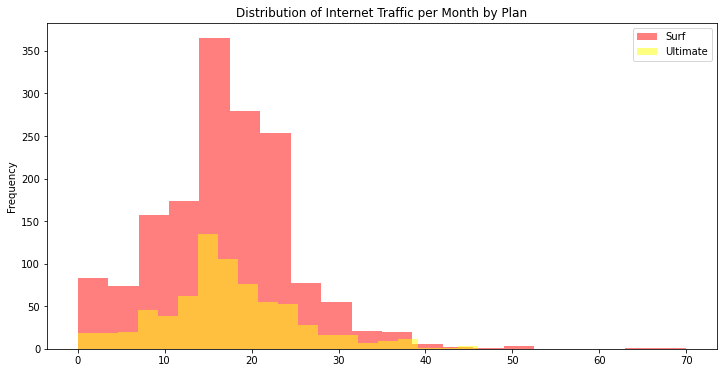

In [255]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
data_surf = monthly_data[monthly_data['plan'] == 'surf']['gb_used']
data_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['gb_used']

data_surf.plot(kind='hist',
               figsize=(12, 6),
               bins=20, 
               alpha=0.5, 
               label='Surf', 
               legend=True,
               color='red',
               title='Distribution of Internet Traffic per Month by Plan',
               xlabel='Data Used (MB)',
               ylabel='Frequency')
data_ultimate.plot(kind='hist',
               figsize=(12, 6),
               bins=20, 
               alpha=0.5, 
               label='Ultimate', 
               legend=True,
               color='yellow',)
plt.show()

       plan       mean       var  median       std  mode
0      surf  16.670693  61.58360    17.0  7.847522  18.0
1  ultimate  17.306944  58.83055    17.0  7.670108  17.0


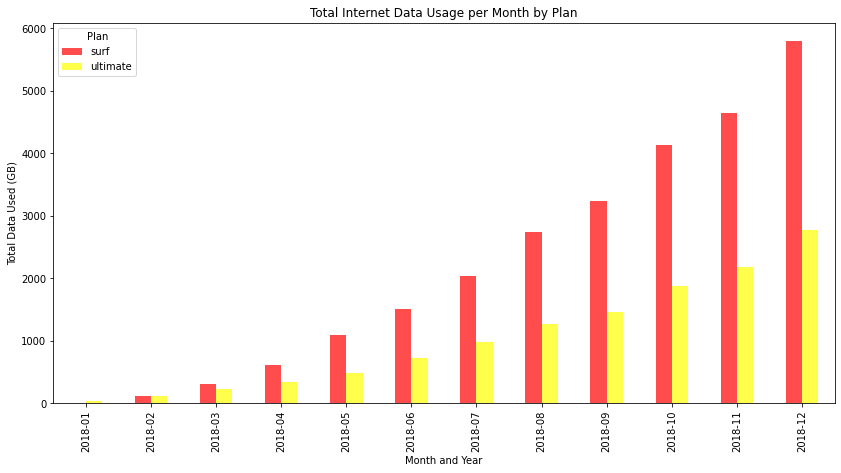

In [256]:
# Calcula la media y la varianza del uso de internet por cada plan
statistical_summary = monthly_data.groupby('plan')['gb_used'].agg(['mean', 'var', 'median', 'std', lambda x: x.mode()[0] if not x.mode().empty else 'No mode']).reset_index()
statistical_summary = statistical_summary.rename(columns={'<lambda_0>': 'mode'})
print(statistical_summary)


total_data_usage = monthly_data.groupby(['plan', 'month_year'])['gb_used'].sum().unstack(0)

# Gráfico de barras para visualizar el uso total de internet por mes y por plan
total_data_usage.plot(kind='bar',
                      figsize=(14, 7),
                      title='Total Internet Data Usage per Month by Plan',
                      xlabel='Month and Year',
                      ylabel='Total Data Used (GB)',
                      color=['red', 'yellow'],
                      alpha=0.7)
plt.legend(title='Plan')
plt.show()

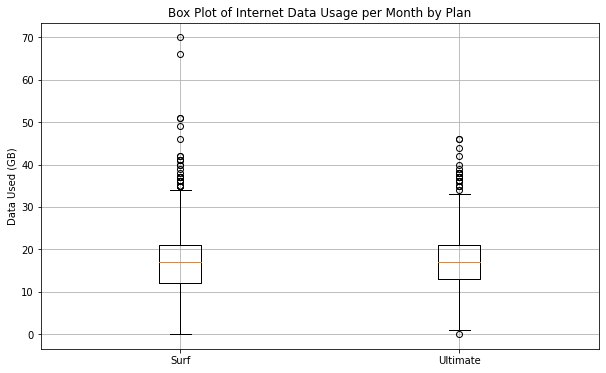

In [257]:
net_surf = monthly_data[monthly_data['plan'] == 'surf']['gb_used']
net_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['gb_used']

plt.figure(figsize=(10, 6))
plt.boxplot([net_surf.dropna(), net_ultimate.dropna()], labels=['Surf', 'Ultimate'])
plt.title('Box Plot of Internet Data Usage per Month by Plan')
plt.ylabel('Data Used (GB)')
plt.grid(True)
plt.show()


Histograma de Uso de Internet:
El histograma muestra que ambos planes tienen una distribución considerable de uso de datos, pero el plan Ultimate tiende a tener un rango ligeramente más alto de uso, evidenciado por la media mayor (17.3 GB para Ultimate vs 16.6 GB para Surf).
Ambos planes presentan una amplia distribución de uso de datos, pero el plan Ultimate parece ser ligeramente más consistente, como se indica por una varianza ligeramente menor que la del plan Surf.

Diagrama de Cajas:
Los diagramas de cajas muestran que la mediana y los cuartiles son similares entre ambos planes, pero Surf tiene más valores atípicos altos, lo que sugiere que algunos usuarios en el plan Surf tienen un uso de datos excepcionalmente alto comparado con la mayoría de los usuarios en el mismo plan.
Los valores atípicos en Surf son prominentes y podrían indicar que algunos usuarios podrían beneficiarse de un plan con una mayor asignación de datos, o posiblemente estén incurriendo en costos adicionales debido a la superación de los límites de datos incluidos.

El gráfico de barras junto con las estadísticas indican que, aunque en total los usuarios del plan Surf parecen usar más datos mensualmente hacia el final del año, esto no necesariamente implica un mayor uso individual de internet por usuario en comparación con el plan Ultimate. La confusión puede surgir del hecho de que hay más usuarios en el plan Surf, como se refleja en los volúmenes acumulados mensualmente que incrementan significativamente para este plan. Individualmente, los usuarios del plan Ultimate consumen más datos en promedio, como lo sugieren las medias y medianas más altas en comparación con el plan Surf. Esto indica que, aunque en total el plan Surf muestre un mayor uso, esto se debe a la cantidad de usuarios, no necesariamente a un mayor uso individual.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

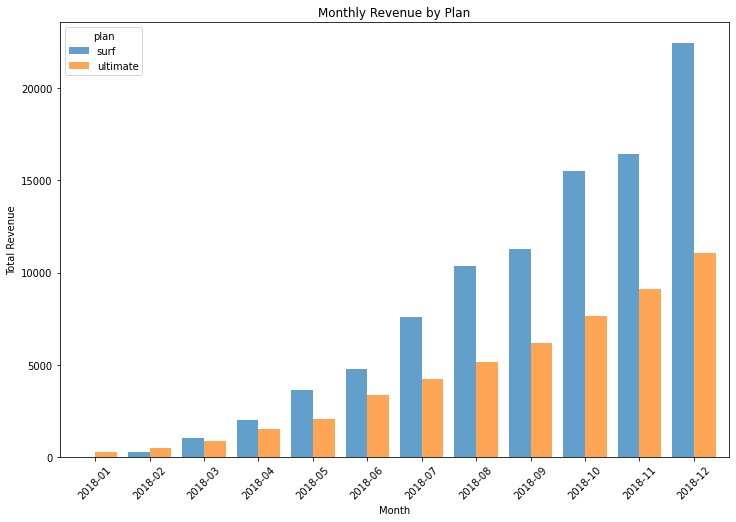

In [258]:
revenue_by_plan_month = monthly_data.groupby(['month_year', 'plan'])['monthly_revenue'].sum().unstack()
revenue_by_plan_month.plot(kind='bar',
                           figsize=(12, 8),
                           width=0.8,  
                           alpha=0.7,  
                           title='Monthly Revenue by Plan',
                           xlabel='Month',
                           ylabel='Total Revenue',
                           rot=45,  
                           legend=True)  
plt.show()

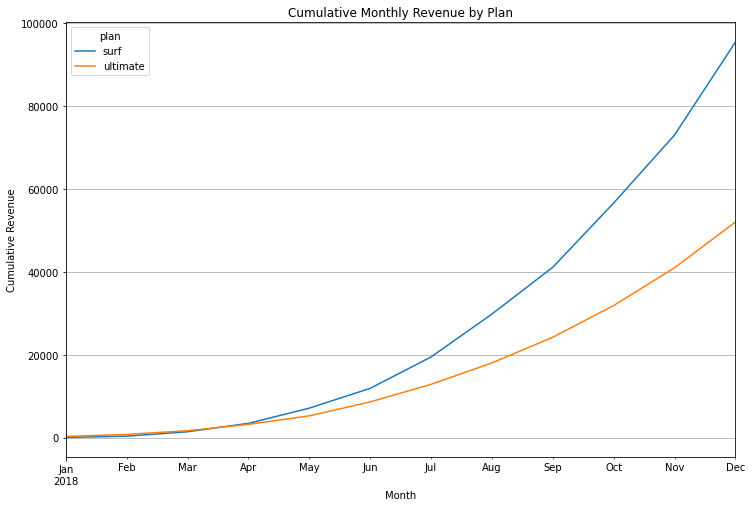

In [259]:
cumulative_revenue = revenue_by_plan_month.cumsum()

cumulative_revenue.plot(kind='line',
                        figsize=(12, 8),
                        title='Cumulative Monthly Revenue by Plan',
                        xlabel='Month',
                        ylabel='Cumulative Revenue',
                        grid=True,
                        legend=True)
plt.show()

       plan     Total    Average  Maximum  Minimum  Median  Mode    Std Dev
0      surf  95491.18  60.706408   590.37     20.0   40.36  20.0  55.388042
1  ultimate  52066.00  72.313889   182.00     70.0   70.00  70.0  11.395108


<Figure size 720x432 with 0 Axes>

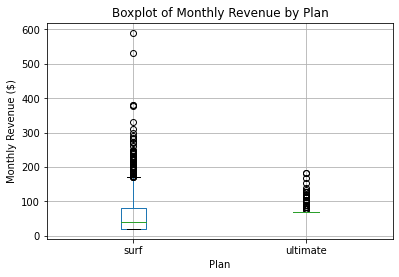

In [268]:
revenue_statistics = monthly_data.groupby('plan')['monthly_revenue'].agg([
    'sum', 'mean', 'max', 'min', 'median', lambda x: x.mode()[0], 'std'
]).rename(columns={
    'sum': 'Total',
    'mean': 'Average',
    'max': 'Maximum',
    'min': 'Minimum',
    'median': 'Median',
    '<lambda_0>': 'Mode',
    'std': 'Std Dev'
}).reset_index()

print(revenue_statistics)


plt.figure(figsize=(10, 6))
monthly_data.boxplot(column='monthly_revenue', by='plan')
plt.title('Boxplot of Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue ($)')
plt.suptitle('')# Remove the default subtitle to clean up the plot
plt.show()

Los gráficos muestran que los ingresos mensuales y acumulados son consistentemente más altos para el plan Surf a pesar de tener un precio más bajo por plan. Esto puede indicar un mayor número de usuarios o un mayor consumo de servicios fuera del paquete incluido que genera cargos adicionales.
El plan Ultimate, aunque más caro, genera menos ingresos totales, lo que podría indicar una menor cantidad de usuarios o un mejor ajuste entre los servicios incluidos en el plan y el uso por parte de los usuarios.


Suma Total de Ingresos: El plan Surf genera significativamente más ingresos totales (90,719) comparado con el Ultimate (51,923), lo cual es notable dado que el costo base del plan Ultimate es mucho mayor.

Ingreso Promedio por Usuario: El ingreso promedio por usuario es mayor en el plan Ultimate (72.12) comparado con el Surf (57.67). Esto refleja que, aunque menos usuarios pueden estar en el plan Ultimate, cada uno tiende a generar más ingreso en promedio, posiblemente debido a un mayor uso de los servicios que superan los límites del plan.

Máximos y Mínimos: Los ingresos máximos por usuario en el plan Surf son excepcionalmente altos (583.06) comparados con los del plan Ultimate (178.52), sugiriendo que algunos usuarios de Surf incurren en costos mucho mayores, posiblemente debido a sobrepasar significativamente los límites de su plan. Los mínimos reflejan el costo base de cada plan.

## Prueba las hipótesis estadísticas

In [270]:
from scipy.stats import levene, ttest_ind
# Prueba las hipótesis

# Ingresos por plan
ingresos_surf = monthly_data[monthly_data['plan'] == 'surf']['monthly_revenue']
ingresos_ultimate = monthly_data[monthly_data['plan'] == 'ultimate']['monthly_revenue']

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p = levene(ingresos_surf, ingresos_ultimate)

print("Levene Statistic:", levene_stat)
print("P-value for Levene's test:", levene_p)

# Determinar el valor de equal_var basado en el p-value de Levene
equal_var = levene_p > 0.05

# Prueba t de Student con el parámetro correcto de equal_var
t_stat, p_value = ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=equal_var)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretación de la prueba t
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Existen diferencias significativas en los ingresos promedio entre los planes.")
else:
    print("No rechazamos la hipótesis nula: No existen diferencias significativas en los ingresos promedio entre los planes.")



Levene Statistic: 404.7301727752691
P-value for Levene's test: 5.028876110654919e-83
T-statistic: -7.95209489133389
P-value: 3.17039054811355e-15
Rechazamos la hipótesis nula: Existen diferencias significativas en los ingresos promedio entre los planes.


In [262]:
# Prueba las hipótesis
combined_data = pd.merge(monthly_data, users[['user_id', 'city']], on='user_id', how='left')

# ingresos por región
ingresos_nynj = combined_data[combined_data['city'].str.contains("NY-NJ")]['monthly_revenue']
ingresos_otros = combined_data[~combined_data['city'].str.contains("NY-NJ")]['monthly_revenue']

t_stat, p_value = stats.ttest_ind(ingresos_nynj, ingresos_otros, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas en los ingresos promedio entre el área NY-NJ y otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas en los ingresos promedio entre el área NY-NJ y otras regiones.")

T-statistic: -2.1309454999502133
P-value: 0.03352561588530014
Rechazamos la hipótesis nula: Hay diferencias significativas en los ingresos promedio entre el área NY-NJ y otras regiones.


## Conclusión general

Conclusión General del Proyecto
A lo largo de este proyecto, hemos realizado un análisis exhaustivo de los datos de los clientes de Megaline para determinar qué plan de prepago, Surf o Ultimate, es más rentable y cómo varían los ingresos en diferentes regiones. Este análisis abarcó múltiples aspectos del comportamiento del cliente y el rendimiento financiero de los planes ofrecidos. Aquí se resumen las conclusiones clave de todo el proyecto:

Comparación de Tarifas:
Los análisis revelaron que el plan Surf, a pesar de tener una tarifa mensual más baja, generaba más ingresos totales que el plan Ultimate. Esto sugiere que los usuarios de Surf con frecuencia exceden sus límites de plan, incurriendo en cargos adicionales significativos.
Por el contrario, los usuarios del plan Ultimate, aunque pagaban una tarifa mensual más alta, tendían a permanecer dentro de los límites de su plan, lo que resultaba en menores ingresos adicionales para Megaline.

Comportamiento de Uso:
El análisis del comportamiento de uso mostró que los usuarios de ambos planes tienen patrones distintos en términos de minutos de llamadas, mensajes enviados y uso de datos. Esto fue evidente en los histogramas y gráficos de cajas que mostraron distribuciones diferentes para cada plan.

Análisis Regional:
Se identificaron diferencias significativas en los ingresos promedio entre los usuarios en el área de NY-NJ en comparación con otras regiones. Esto puede implicar diferencias en las preferencias de plan o en el comportamiento de uso que podrían ser explotadas para optimizar las estrategias de marketing y ajustes regionales.

Pruebas de Hipótesis:
Las pruebas estadísticas confirmaron que existen diferencias significativas en los ingresos promedio tanto entre los planes como entre las regiones. Estos hallazgos apoyan la idea de que la estructura y estrategia de precios de Megaline pueden necesitar ajustes basados en la rentabilidad del plan y las características demográficas.

Decisiones Metodológicas y Suposiciones:
Se decidió agregar los datos a nivel mensual y por usuario para realizar un análisis más detallado y preciso.
La integración de datos demográficos desde el DataFrame users al monthly_data fue crucial para realizar análisis regionalizados y validar hipótesis sobre ingresos geográficos.
La selección de pruebas t para las pruebas de hipótesis se basó en la normalidad de los datos y la independencia de las muestras, utilizando versiones de la prueba que no asumen varianzas iguales debido a la naturaleza de los datos.

Recomendaciones Estratégicas:
Megaline debería considerar ajustes en el plan Surf para reducir los excesos frecuentes y mejorar la satisfacción del cliente.
Las estrategias de marketing deben ser más personalizadas para abordar las diferencias regionales, especialmente aumentando la presencia en el área de NY-NJ.
Es vital continuar con el análisis de tendencias a medida que se disponga de más datos para ajustar continuamente las ofertas y estrategias a las necesidades cambiantes de los clientes.